In [2]:
%load_ext autoreload
%autoreload 2

# Test 1

In [8]:
from qward.examples.papers.qft.qft_configs import (
    get_configs_by_type,
    get_config,
    get_noise_config,
    ALL_EXPERIMENT_CONFIGS,
    NOISE_CONFIGS,
)

# Test 1: Validate configurations
print("\n1. Testing configuration generators...")
rt_configs = get_configs_by_type("scalability_roundtrip")
print(f"   ✓ Roundtrip scalability configs: {len(rt_configs)} configurations")

pd_configs = get_configs_by_type("scalability_period")
print(f"   ✓ Period scalability configs: {len(pd_configs)} configurations")

pv_configs = get_configs_by_type("period_variation")
print(f"   ✓ Period variation configs: {len(pv_configs)} configurations")

print(f"   ✓ Total experiment configs: {len(ALL_EXPERIMENT_CONFIGS)}")
print(f"   ✓ Noise configurations: {len(NOISE_CONFIGS)}")


1. Testing configuration generators...
   ✓ Roundtrip scalability configs: 9 configurations
   ✓ Period scalability configs: 8 configurations
   ✓ Period variation configs: 7 configurations
   ✓ Total experiment configs: 29
   ✓ Noise configurations: 6


# Test 2

In [9]:
# Test 2: Run a minimal roundtrip experiment
print("\n2. Running minimal roundtrip experiment (2 qubits)...")
from qward.algorithms import QFTCircuitGenerator
from qward.algorithms.executor import QuantumCircuitExecutor

executor = QuantumCircuitExecutor()

gen = QFTCircuitGenerator(num_qubits=2, test_mode="roundtrip", input_state="11")
result = executor.simulate(gen.circuit, success_criteria=gen.success_criteria)

print(f"   ✓ Simulation completed")
print(f'   ✓ Counts: {result["counts"]}')

# Calculate success rate manually
total = sum(result["counts"].values())
success = sum(c for s, c in result["counts"].items() if gen.success_criteria(s))
success_rate = success / total if total > 0 else 0
print(f"   ✓ Success rate: {success_rate:.2%}")


2. Running minimal roundtrip experiment (2 qubits)...
   ✓ Simulation completed
   ✓ Counts: {'11': 1024}
   ✓ Success rate: 100.00%


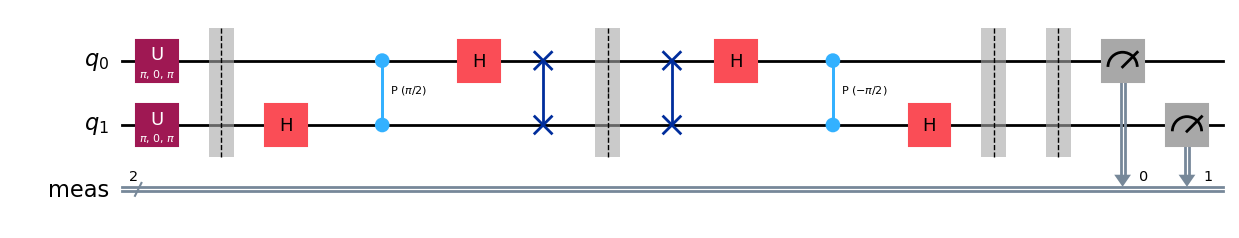

In [10]:
gen.draw()

# Test 3

In [12]:
# Test 3: Run period detection
print("\n3. Running minimal period detection experiment (3 qubits, period=2)...")
gen_pd = QFTCircuitGenerator(num_qubits=3, test_mode="period_detection", period=2)
result_pd = executor.simulate(gen_pd.circuit, success_criteria=gen_pd.success_criteria)
print(f"   ✓ Simulation completed")
print(f'   ✓ Counts: {result_pd["counts"]}')
print(f"   ✓ Expected peaks: {list(gen_pd.expected_distribution().keys())}")

# Calculate success rate
total_pd = sum(result_pd["counts"].values())
success_pd = sum(c for s, c in result_pd["counts"].items() if gen_pd.success_criteria(s))
success_rate_pd = success_pd / total_pd if total_pd > 0 else 0
print(f"   ✓ Success rate: {success_rate_pd:.2%}")


3. Running minimal period detection experiment (3 qubits, period=2)...
   ✓ Simulation completed
   ✓ Counts: {'100': 1024}
   ✓ Expected peaks: ['000', '100']
   ✓ Success rate: 100.00%


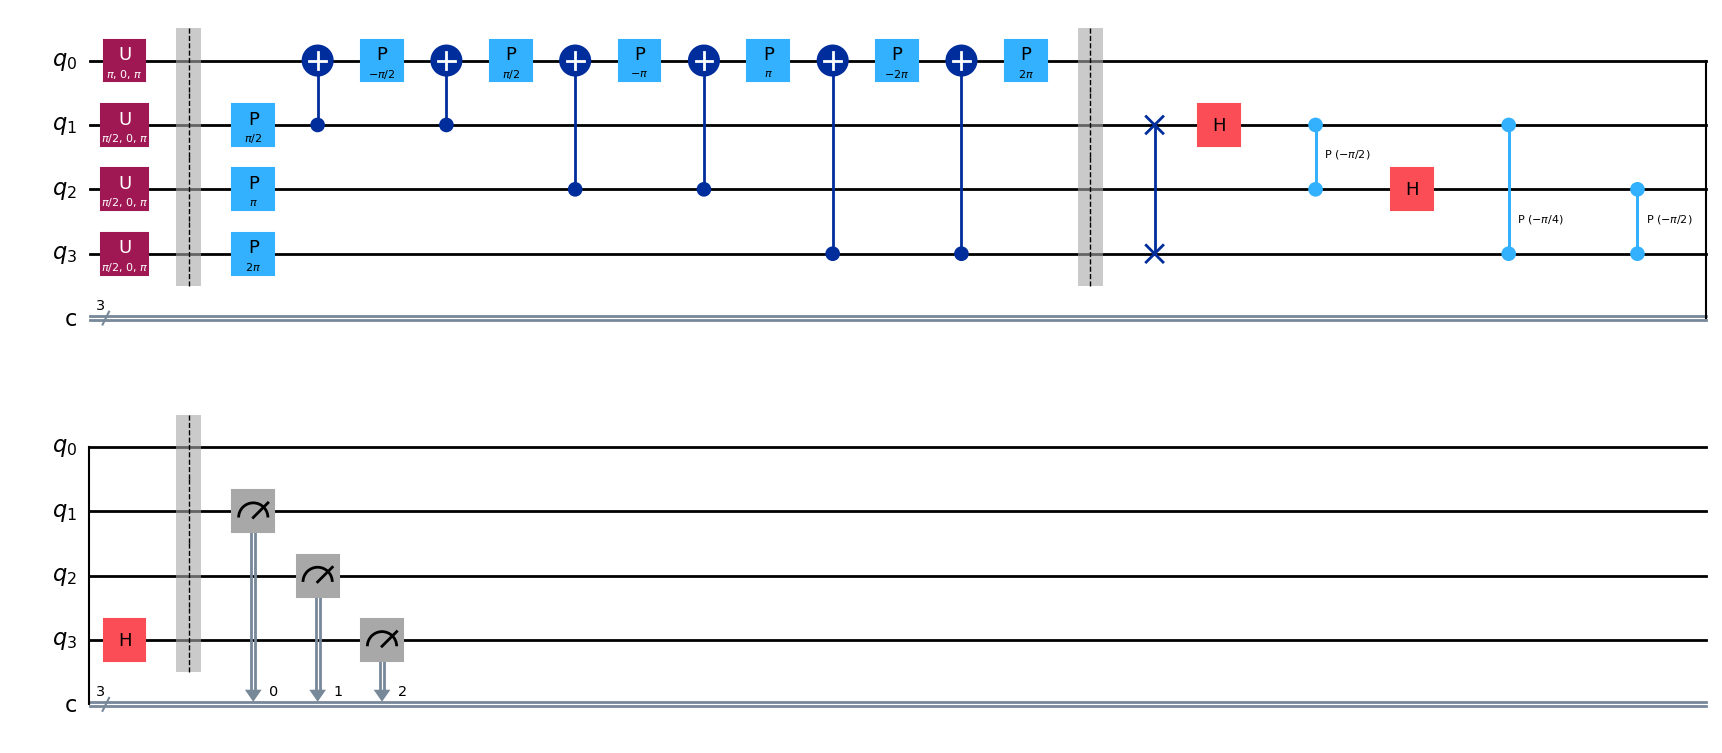

In [13]:
gen_pd.draw()

# test 4

In [15]:
# Test 4: Phase estimation
print("\n4. Running minimal phase estimation (T gate, 3 counting qubits)...")
from qward.algorithms import PhaseEstimationCircuitGenerator

pe = PhaseEstimationCircuitGenerator(test_case="t_gate", num_counting_qubits=3)
result_pe = executor.simulate(pe.circuit, success_criteria=pe.success_criteria)
print(f"   ✓ Simulation completed")
print(f"   ✓ Expected phase: {pe.get_expected_phase()} (1/8)")
print(f"   ✓ Expected measurement: {list(pe.expected_distribution().keys())}")
print(f'   ✓ Counts: {result_pe["counts"]}')

# Calculate success rate
total_pe = sum(result_pe["counts"].values())
success_pe = sum(c for s, c in result_pe["counts"].items() if pe.success_criteria(s))
success_rate_pe = success_pe / total_pe if total_pe > 0 else 0
print(f"   ✓ Success rate: {success_rate_pe:.2%}")


4. Running minimal phase estimation (T gate, 3 counting qubits)...
   ✓ Simulation completed
   ✓ Expected phase: 0.125 (1/8)
   ✓ Expected measurement: ['001']
   ✓ Counts: {'001': 1024}
   ✓ Success rate: 100.00%


# test 5

In [17]:
# Test 5: Pre-runtime metrics integration
print("\n5. Testing pre-runtime metrics integration...")
from qward.scanner import Scanner
from qward.metrics import QiskitMetrics, ComplexityMetrics

scanner = Scanner(gen.circuit, strategies=[QiskitMetrics, ComplexityMetrics])
metrics_df = scanner.calculate_metrics()

# Use correct column names
qiskit_row = metrics_df["QiskitMetrics"].iloc[0]
complexity_row = metrics_df["ComplexityMetrics"].iloc[0]
print(f'   ✓ Circuit depth: {qiskit_row["basic_metrics.depth"]}')
print(f'   ✓ Gate count: {qiskit_row["basic_metrics.size"]}')
print(f'   ✓ Two-qubit gates: {complexity_row["gate_based_metrics.two_qubit_count"]}')
print(f"   ✓ Metrics calculated successfully")


5. Testing pre-runtime metrics integration...
   ✓ Circuit depth: 10
   ✓ Gate count: 12
   ✓ Two-qubit gates: 4.0
   ✓ Metrics calculated successfully


# test 6

In [18]:
# Test 6: Verify experiment runner can be called
print("\n6. Testing experiment runner...")
from qward.examples.papers.qft.qft_experiment import run_single_experiment

# Get configs
exp_config = get_config("SR2")  # 2-qubit roundtrip
noise_config = get_noise_config("IDEAL")  # No noise
print(f"   ✓ Config SR2 loaded: {exp_config.description}")

result = run_single_experiment(exp_config, noise_config, run_number=1, shots=100)
print(f"   ✓ Experiment completed")
print(f"   ✓ Success rate: {result.success_rate:.2%}")
print(f"   ✓ Execution time: {result.execution_time_ms:.1f}ms")
print(f'   ✓ QWARD metrics captured: {"qiskit_metrics" in result.qward_metrics}')


6. Testing experiment runner...
   ✓ Config SR2 loaded: 2 qubits, round-trip, input |01⟩
   ✓ Experiment completed
   ✓ Success rate: 100.00%
   ✓ Execution time: 2.4ms
   ✓ QWARD metrics captured: False
